# Data Preprocessing

In [1]:
# Set the path to your dataset directory
directory = '/home/sky/Desktop/driver_drowsiness/dataset/train/'
categories = ['0','1','2','3']

# 0 : Open Eye
# 1 : No Yawn
# 2 : Yawn
# 3 : Clsed Eye

In [2]:
import imageio
import os

size_data = {}
for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    temp_dict = {}
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        height, width, channels = imageio.imread(filepath).shape
        if str(height) + ' x ' + str(width) in temp_dict:
            temp_dict[str(height) + ' x ' + str(width)] += 1 
        else:
            temp_dict[str(height) + ' x ' + str(width)] = 1
    
    size_data[i] = temp_dict
        
size_data

/tmp/ipykernel_36989/25323711.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  height, width, channels = imageio.imread(filepath).shape


{'0': {'536 x 536': 2,
  '169 x 226': 1,
  '300 x 391': 2,
  '102 x 113': 1,
  '80 x 80': 1,
  '225 x 225': 1,
  '300 x 478': 1,
  '341 x 300': 2,
  '135 x 158': 1,
  '634 x 634': 1,
  '300 x 346': 2,
  '300 x 356': 2,
  '276 x 276': 1,
  '108 x 112': 1,
  '262 x 268': 1,
  '300 x 378': 2,
  '249 x 249': 1,
  '300 x 424': 2,
  '68 x 69': 1,
  '175 x 237': 1,
  '378 x 390': 1,
  '300 x 440': 1,
  '300 x 404': 2,
  '300 x 300': 9,
  '383 x 300': 1,
  '533 x 533': 1,
  '310 x 300': 2,
  '300 x 364': 3,
  '105 x 105': 1,
  '126 x 166': 1,
  '280 x 280': 1,
  '58 x 87': 1,
  '300 x 331': 2,
  '819 x 819': 1,
  '112 x 112': 1,
  '300 x 328': 1,
  '221 x 244': 1,
  '1029 x 1029': 1,
  '505 x 505': 2,
  '300 x 568': 1,
  '174 x 163': 1,
  '251 x 316': 1,
  '298 x 332': 1,
  '114 x 128': 1,
  '592 x 592': 1,
  '69 x 83': 1,
  '300 x 428': 2,
  '50 x 87': 1,
  '300 x 453': 1,
  '306 x 300': 2,
  '359 x 583': 1,
  '578 x 577': 1,
  '130 x 131': 1,
  '271 x 271': 2,
  '712 x 711': 1,
  '191 x 192'

0


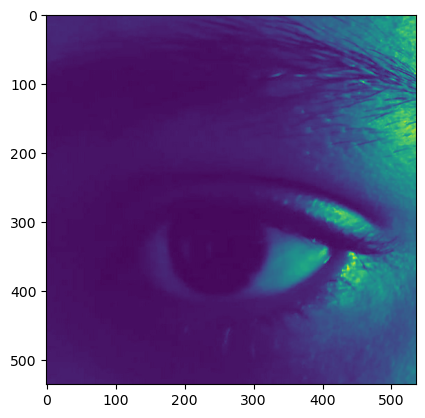

1


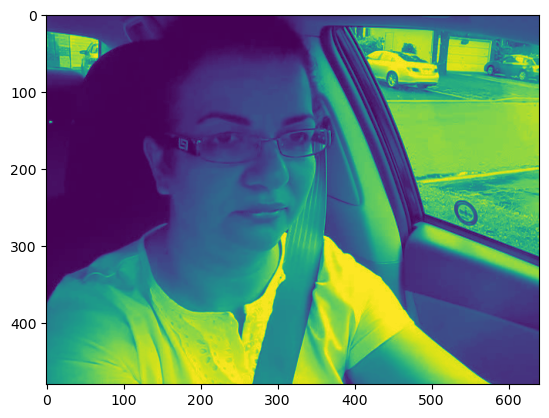

2


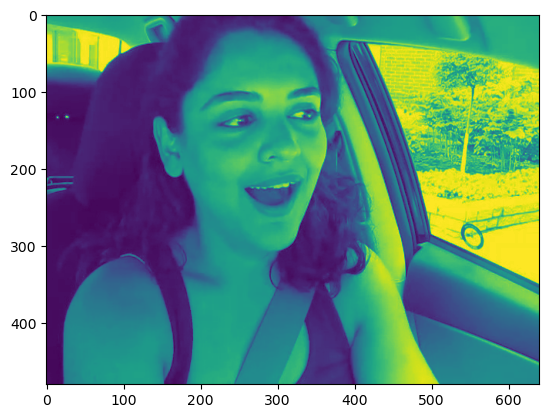

3


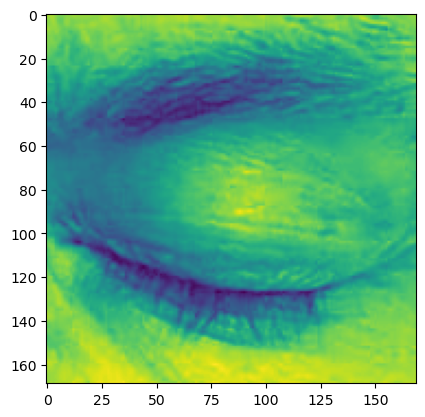

In [17]:
import cv2
import matplotlib.pyplot as plt
for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        print(i)
        img = cv2.imread(filepath, 0)
        plt.imshow(img)
        plt.show()
        break

In [18]:
import numpy as np 
import random
from collections import Counter

data = []
img_size = 128

for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath)
        # preprocess here
        img = cv2.resize(img, (img_size, img_size))
        data.append([img, class_num])
        
random.shuffle(data)

X, y = [], []
for feature, label in data:
    X.append(feature)
    y.append(label)
    
print('X length:', len(X))
print('y counts:', Counter(y))

# normalize
X = np.array(X).reshape(-1, img_size, img_size, 3)
X = X / 255.0
y = np.array(y)



X length: 2467
y counts: Counter({0: 617, 2: 617, 3: 617, 1: 616})


# Dataset Splitting



In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)

print(len(X_train), X_train.shape)
print(len(X_test), X_test.shape)
print(len(X_valid), X_valid.shape)

1973 (1973, 128, 128, 3)
247 (247, 128, 128, 3)
247 (247, 128, 128, 3)


In [22]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the training labels and transform them
y_train = label_encoder.fit_transform(y_train)

y_test = label_encoder.fit_transform(y_test)
# Transform the validation labels
y_valid = label_encoder.transform(y_valid)

# Convert integer labels to one-hot encoded labels
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)
y_valid = to_categorical(y_valid, num_classes=4)


# Model Building and Training



In [26]:
# import essential layers
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Rescaling, Conv2D, MaxPooling2D, Dropout, Flatten, Dense


img_height = 128
img_width = 128

# Convolutional Neural Network architecture
model = Sequential()
model.add(Conv2D(filters=16, kernel_size = (3, 3), padding = 'same', activation = 'relu', kernel_initializer="he_normal", input_shape = (img_height, img_width, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation = 'relu', kernel_initializer="he_normal"))
model.add(MaxPooling2D())

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 4, activation = 'softmax'))


2023-06-07 20:15:30.385387: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16777216 exceeds 10% of free system memory.


## Compiling the Model

In [27]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

## Fitting the Model

In [28]:
history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 10)

Epoch 1/10
62/62 [==============================] - 16s 241ms/step - loss: 0.7923 - accuracy: 0.6640 - val_loss: 0.3999 - val_accuracy: 0.8178
Epoch 2/10
62/62 [==============================] - 15s 235ms/step - loss: 0.3311 - accuracy: 0.8555 - val_loss: 0.3234 - val_accuracy: 0.8381
Epoch 3/10
62/62 [==============================] - 15s 235ms/step - loss: 0.2023 - accuracy: 0.9209 - val_loss: 0.2045 - val_accuracy: 0.9109
Epoch 4/10
62/62 [==============================] - 17s 270ms/step - loss: 0.1385 - accuracy: 0.9437 - val_loss: 0.2016 - val_accuracy: 0.9069
Epoch 5/10
62/62 [==============================] - 15s 250ms/step - loss: 0.1099 - accuracy: 0.9615 - val_loss: 0.1112 - val_accuracy: 0.9555
Epoch 6/10
62/62 [==============================] - 16s 251ms/step - loss: 0.0816 - accuracy: 0.9696 - val_loss: 0.1757 - val_accuracy: 0.9433
Epoch 7/10
62/62 [==============================] - 16s 253ms/step - loss: 0.0456 - accuracy: 0.9878 - val_loss: 0.1324 - val_accuracy: 0.9433

In [32]:
#model.save('/home/sky/Desktop/driver_drowsiness/cnn_m_dd.h5')

In [29]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Validation loss: {round(loss,2)}")
print(f"Validation accuracy: {round(accuracy,2)}")

8/8 [==============================] - 0s 47ms/step - loss: 0.1952 - accuracy: 0.9474
Validation loss: 0.2
Validation accuracy: 0.95


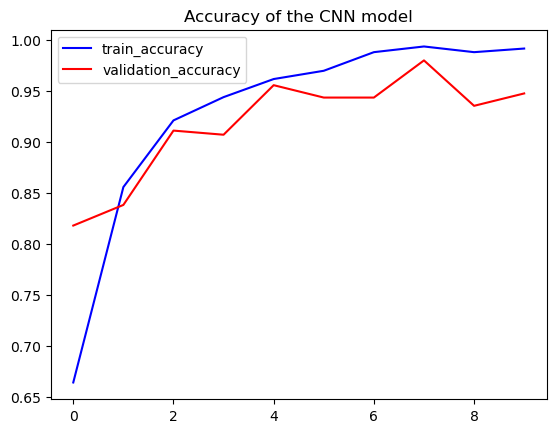

In [30]:
import matplotlib.pyplot as plt

# Plot the accuracy score of our model
plt.plot(history.history['accuracy'], c='b', label='train_accuracy')
plt.plot(history.history['val_accuracy'], c='r', label='validation_accuracy')
plt.title('Accuracy of the CNN model')
plt.legend()
plt.show()

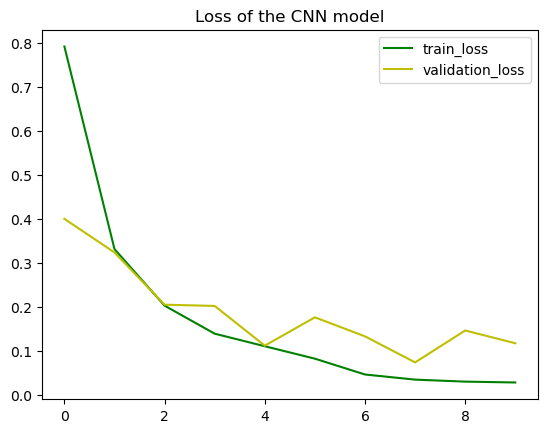

In [31]:
# Plot the loss value of our model
plt.plot(history.history['loss'], c='g', label='train_loss')
plt.plot(history.history['val_loss'], c='y', label='validation_loss')
plt.title('Loss of the CNN model')
plt.legend()
plt.show()


# Performance Analysis

In [33]:
# Import the accuracy score function
from sklearn.metrics import accuracy_score

# Generate predictions for the validation dataset
y_pred = model.predict(X_test)

# Get the predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = np.argmax(y_test, axis=1) # assuming y_valid is in a multi-class format

# Calculate the accuracy
acc = accuracy_score(y_true, y_pred_classes)

print(f"Accuracy score of the model: {round(acc, 2)}")

8/8 [==============================] - 0s 47ms/step
Accuracy score of the model: 0.95


In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Generate predictions for the validation dataset
y_pred = model.predict(X_test)

# Get the predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = np.argmax(y_test, axis=1) # assuming y_valid is in a multi-class format

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Print the confusion matrix
print(confusion_mtx)


8/8 [==============================] - 0s 45ms/step
[[62  0  0  4]
 [ 0 58  6  0]
 [ 0  2 66  0]
 [ 1  0  0 48]]


In [38]:
# import numpy as np
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Generate predictions for the validation dataset
# y_pred = model.predict(X_valid)

# # Get the predicted classes
# y_pred_classes = np.argmax(y_pred, axis=1)

# # Get the true classes
# y_true = np.argmax(y_valid, axis=1) # assuming y_valid is in a multi-class format

# # Compute the confusion matrix
# confusion_mtx = confusion_matrix(y_true, y_pred_classes)


# # Plot the heatmap
# sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')#"YlGnBu")

# # Add labels and title
# plt.xlabel('Predicted label')
# plt.ylabel('True label')
# plt.title('Confusion Matrix')

# # Show the plot
# plt.show()


8/8 [==============================] - 0s 47ms/step


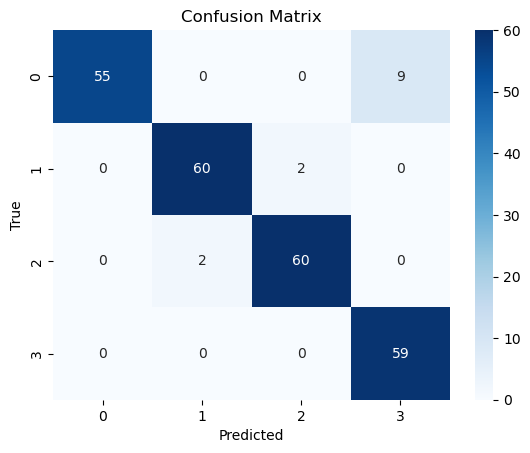

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions for the validation dataset
y_pred = model.predict(X_valid)

# Get the predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = np.argmax(y_valid, axis=1) # assuming y_valid is in a multi-class format

# Class names
class_names = ['0','1','2','3']


# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [37]:
from sklearn.metrics import classification_report


# Generate predictions for the validation dataset
y_pred = model.predict(X_valid)

# Get the predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = np.argmax(y_valid, axis=1) # assuming y_valid is in a multi-class format

# Class names
class_names = ['0','1','2','3']

# Get the classification report
class_report = classification_report(y_true, y_pred_classes, target_names = class_names)

# Print the classification report
print(class_report)

8/8 [==============================] - 0s 45ms/step
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        64
           1       0.97      0.97      0.97        62
           2       0.97      0.97      0.97        62
           3       0.87      1.00      0.93        59

    accuracy                           0.95       247
   macro avg       0.95      0.95      0.95       247
weighted avg       0.95      0.95      0.95       247

